In [1]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
def df():
    df

In [2]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [3]:
india_states = json.load(open("states_india.geojson", "r"))

In [4]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]


In [5]:
df = pd.read_csv("census.csv")
df["Density"] = df["Density[a]"].apply(lambda x: int(x.split("/")[0].replace(",", "")))
df["id"] = df["State or union territory"].apply(lambda x: state_id_map[x])

In [6]:
df.head()

,Rank,State or union territory,Population,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Density,id
0,1.0,Uttar Pradesh,199812341,NaN,20.20%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,828,9
1,2.0,Maharashtra,112374333,NaN,20.00%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,365,27
2,3.0,Bihar,104099452,NaN,25.40%,92341436,NaN,11758016,NaN,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,1102,10
3,4.0,West Bengal,91276115,NaN,13.80%,62183113,NaN,29093002,NaN,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029,19
4,5.0,Madhya Pradesh,72626809,NaN,16.30%,52557404,NaN,20069405,NaN,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,236,23


<Axes: >

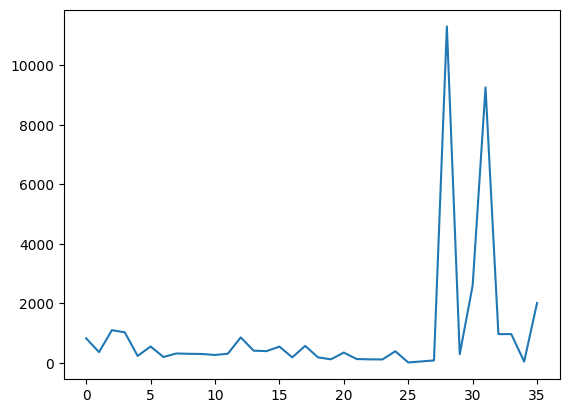

In [7]:
df["Density"].plot()

In [8]:
df["DensityScale"] = np.log10(df["Density"])

<Axes: >

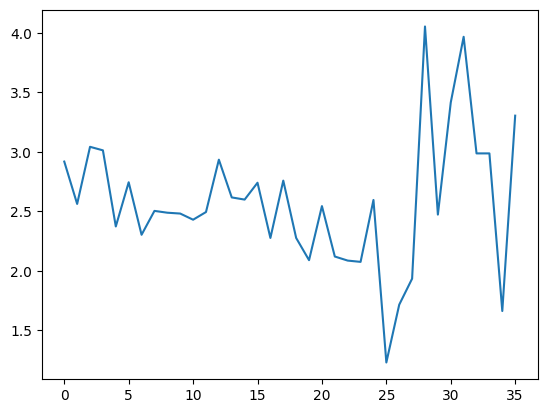

In [9]:
df["DensityScale"].plot()

In [10]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Working Farmers Population Density",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [11]:
fig = px.choropleth_mapbox(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="Indian Crop Production Ratio ",
    mapbox_style="carto-positron",
    center={"lat": 24, "lon": 78},
    zoom=3,
    opacity=0.5,
)
fig.show()

In [12]:
df["SexRatioScale"] = df["Sex ratio"] - 1000

In [13]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="SexRatioScale",
    hover_name="State or union territory",
    hover_data=["Sex ratio"],
    title="India Working Farmer Ratio",
    color_continuous_scale=px.colors.diverging.BrBG,
    color_continuous_midpoint=0,
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()